<a href="https://colab.research.google.com/github/Dorcy64/Google-Trends-and-Data-Visualization/blob/main/Google_Trends_and_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [44]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [45]:
print(df_tesla.shape)
print(df_tesla.head())

(124, 3)
        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368


In [46]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()} ')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2 


In [47]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [48]:
df_tesla.groupby("MONTH")

### Unemployment Data

In [49]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [50]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [51]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


### Bitcoin

In [52]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [53]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [54]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

In [55]:
print(f'Missing values for Tesla?: {df_tesla.isna().sum()}')
print(f'Missing values for U/E?: {df_unemployment.isna().sum()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().sum()}')

Missing values for Tesla?: MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64
Missing values for U/E?: MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64
Missing values for BTC Search?: MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64


In [56]:
print(f'Missing values for BTC price?: {df_btc_price.isna().sum()}')

Missing values for BTC price?: DATE      0
CLOSE     1
VOLUME    1
dtype: int64


In [57]:
print(f'Number of missing values: 1')

Number of missing values: 1


In [58]:
df_btc_price = df_btc_price.dropna()

### Convert Strings to DateTime Objects

In [59]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"], format="%Y-%m-%d")
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [60]:
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"], format="%Y-%m-%d")
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [70]:
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [62]:
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"], format="%Y-%m")
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [63]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [64]:
# Create locators for ticks on the time axis
year = mdates.YearLocator()
month = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

In [65]:
# Register date converters to avoid warning messages


### Tesla Stock Price v.s. Search Volume

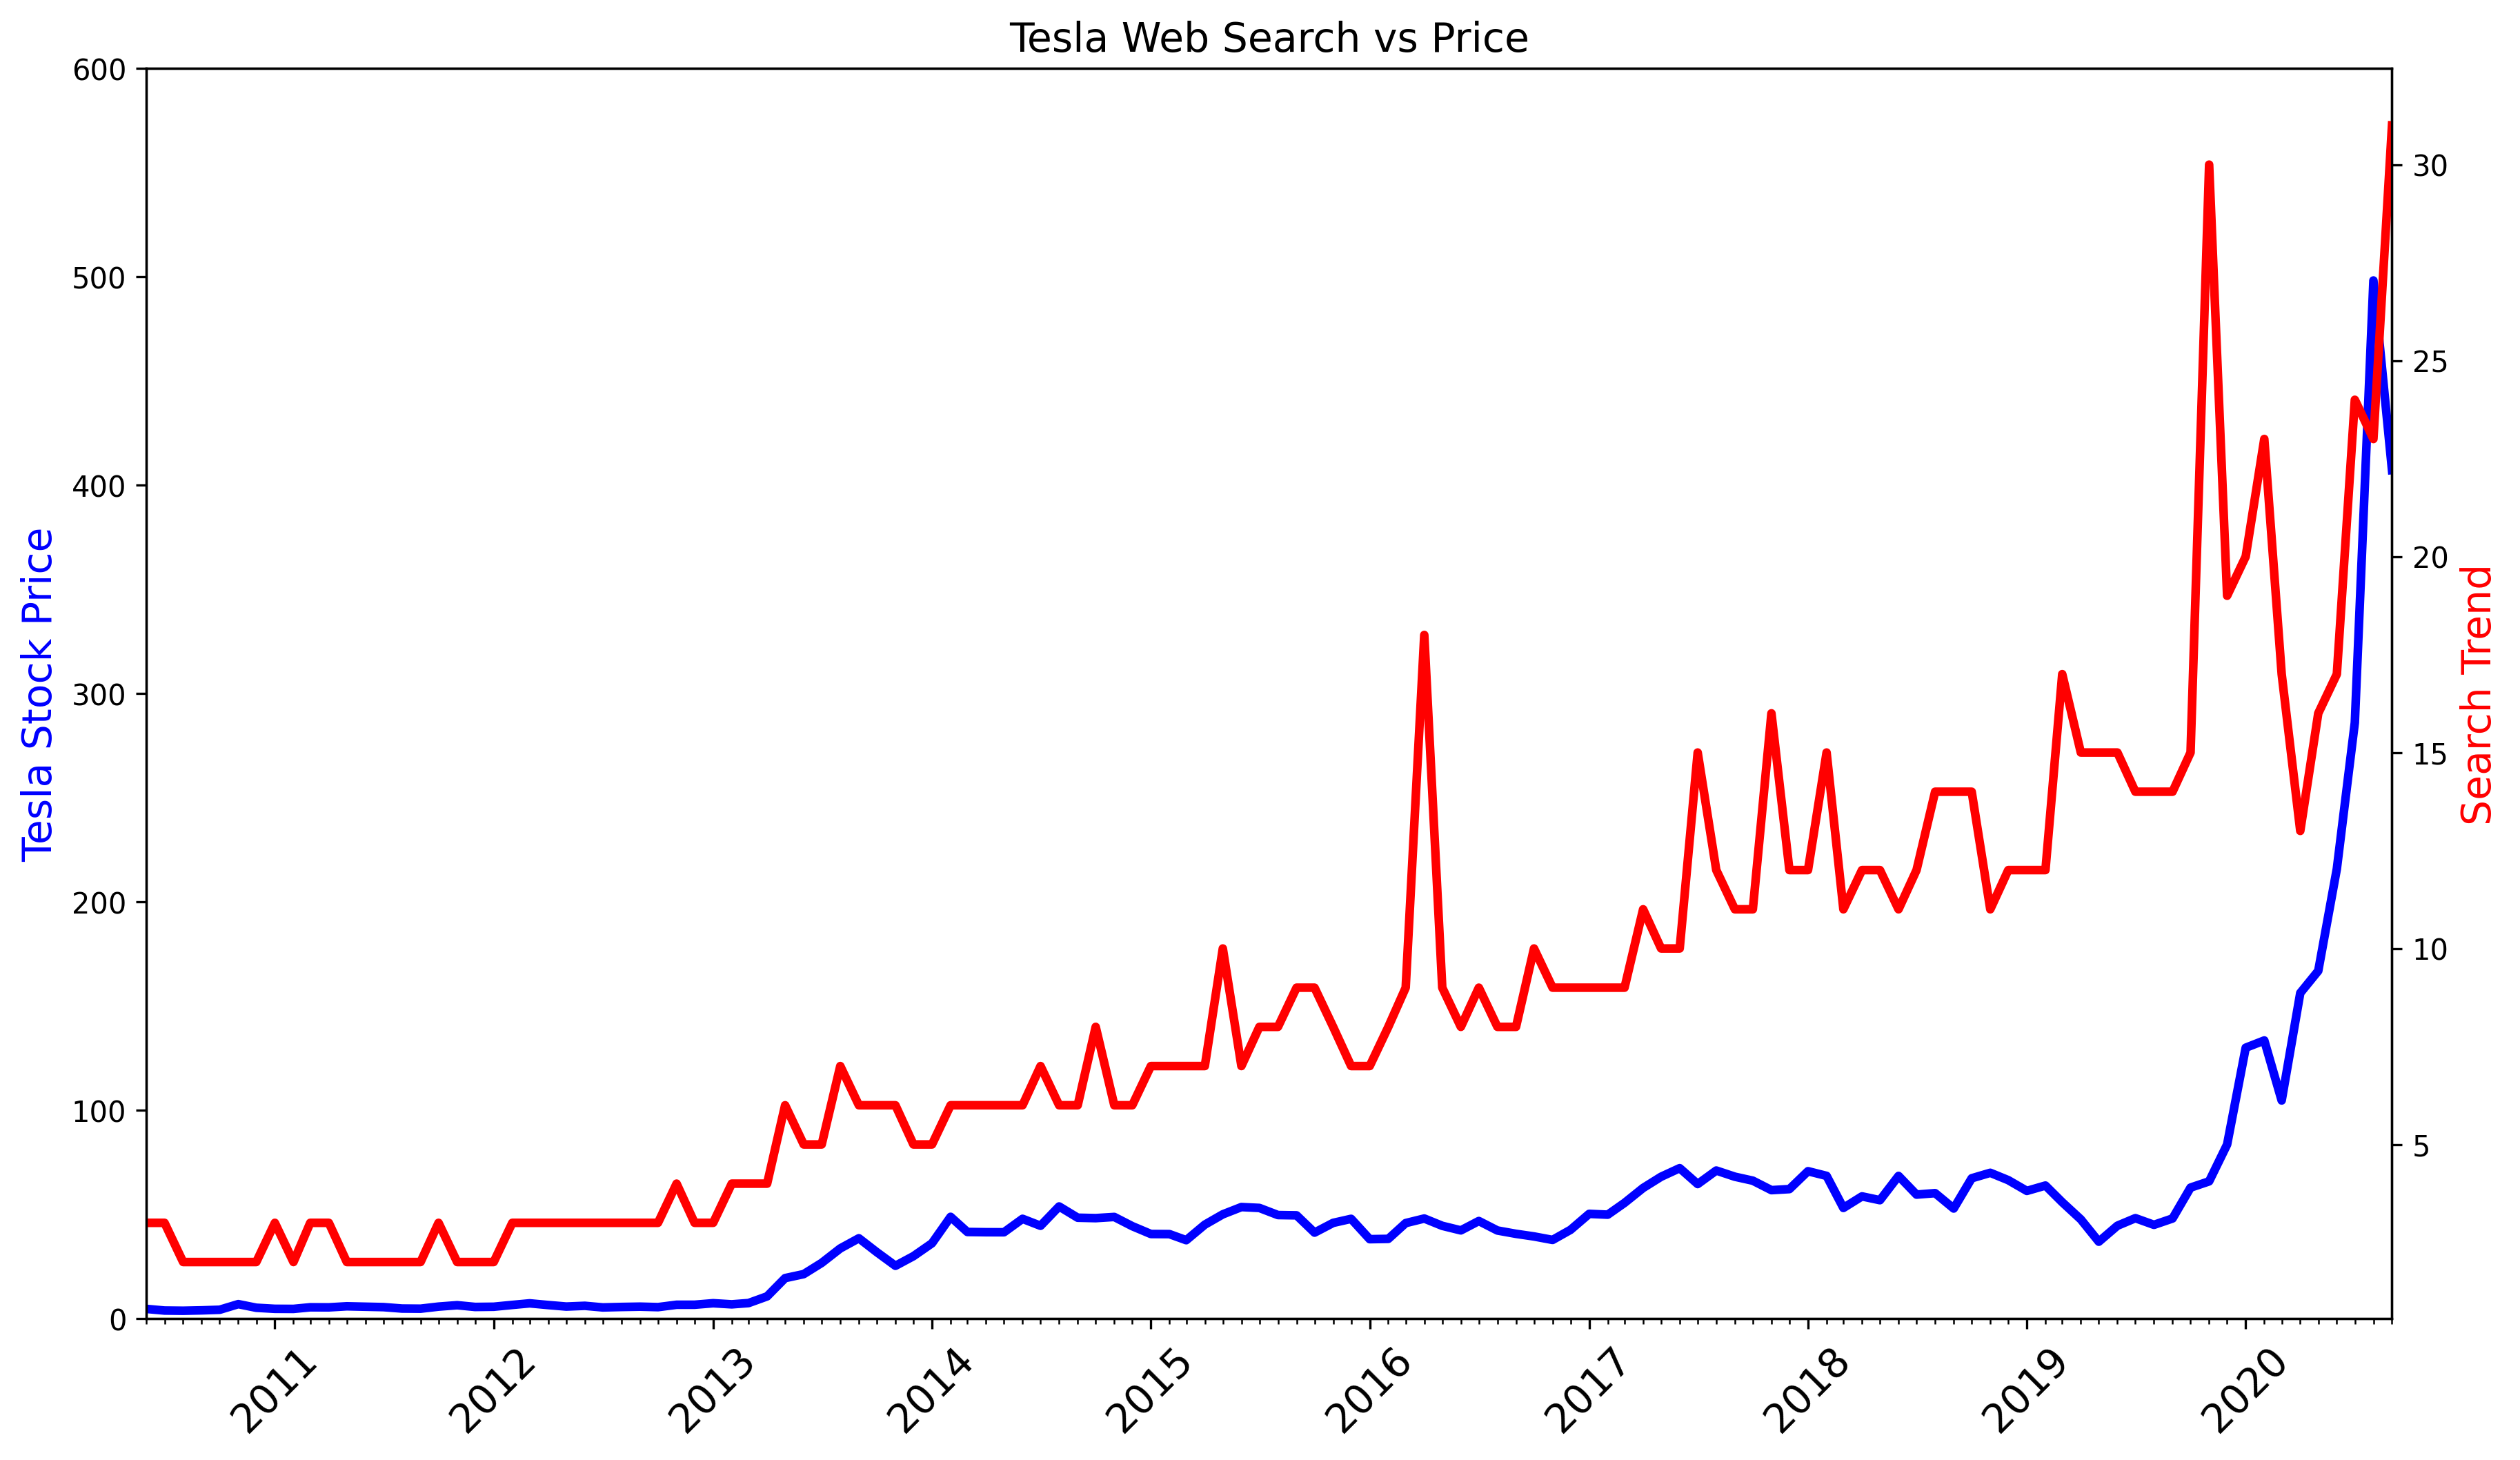

In [66]:
plt.figure(figsize=(14, 8), dpi=300)
plt.xticks(fontsize=14, rotation=45)
plt.title("Tesla Web Search vs Price", fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel("Tesla Stock Price", color="Blue", fontsize=14)
ax2.set_ylabel("Search Trend", color="Red", fontsize=14)
ax1.plot(df_tesla["MONTH"], df_tesla["TSLA_USD_CLOSE"], color="Blue", linewidth=3)
ax2.plot(df_tesla["MONTH"], df_tesla["TSLA_WEB_SEARCH"], color="Red", linewidth=3)
ax1.set_xlim(left=df_tesla["MONTH"].min(), right=df_tesla["MONTH"].max())
ax1.set_ylim(0, 600)
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(month)
plt.show()

In [67]:
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [68]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


### Bitcoin (BTC) Price v.s. Search Volume

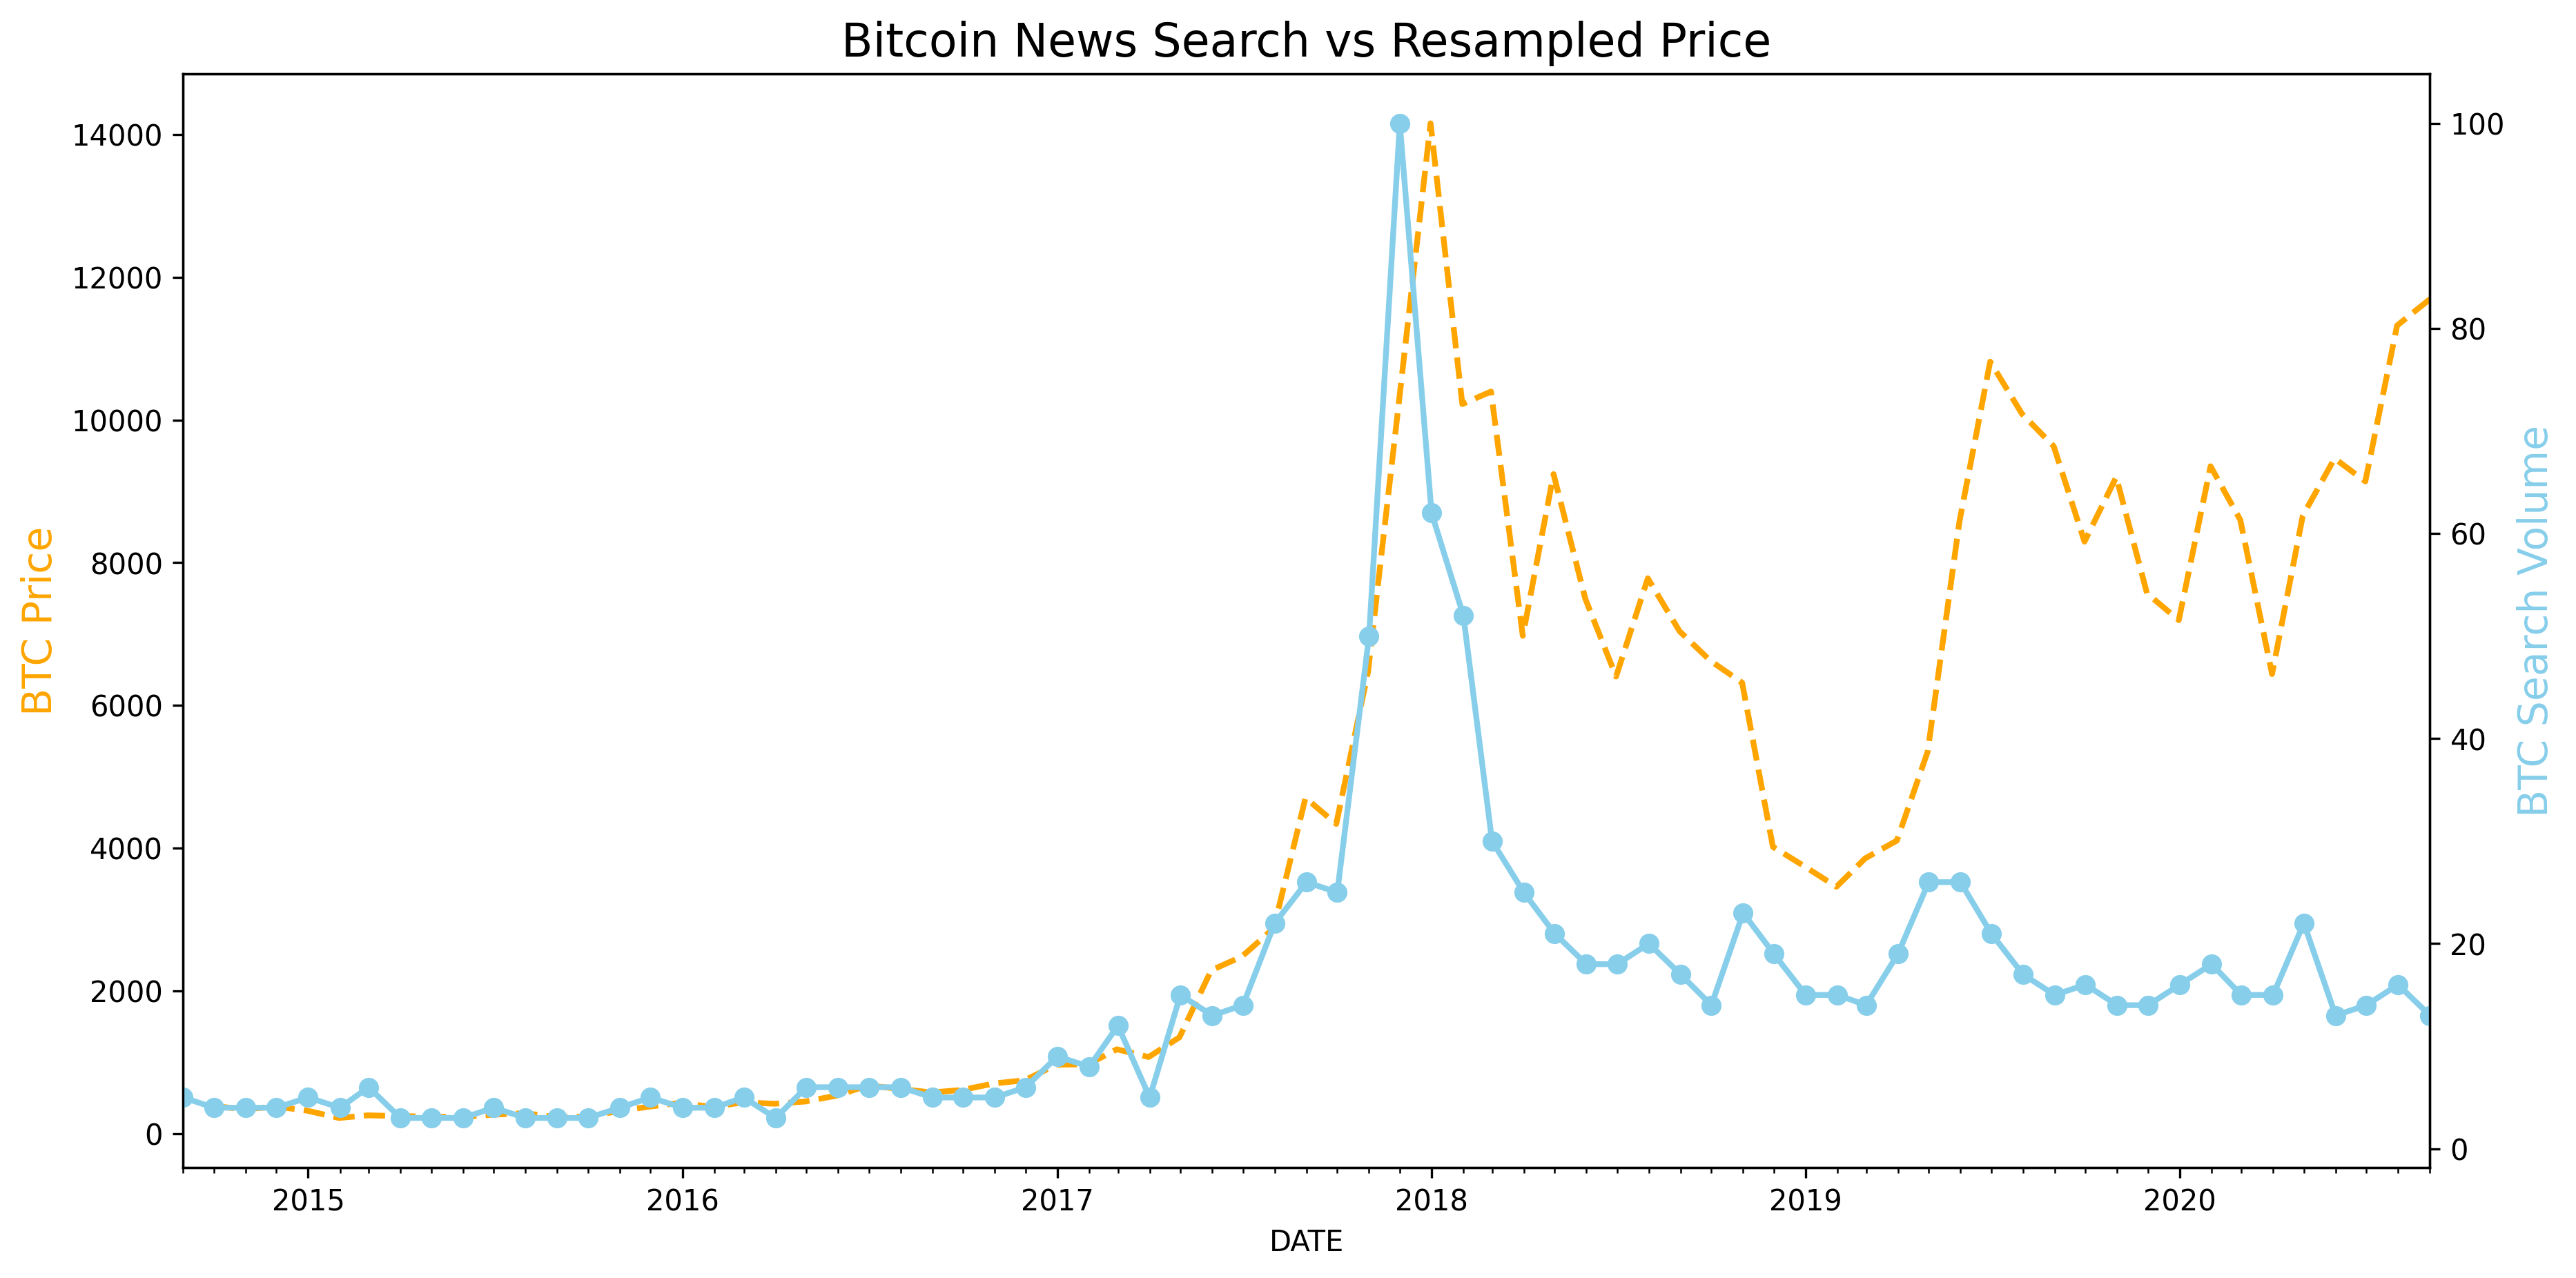

In [82]:
plt.figure(figsize=(14, 7), dpi=300)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=16)
ax1 = plt.gca()
ax2 = ax1.twinx()
plt.xlim(df_btc_search["MONTH"].min(), df_btc_search["MONTH"].max())

ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_minor_locator(month)

ax1.set_xlabel("DATE")
ax1.set_ylabel("BTC Price", color="orange", fontsize=14)
ax2.set_ylabel("BTC Search Volume", color="skyblue", fontsize=14)
ax1.plot(df_btc_monthly["DATE"], df_btc_monthly["CLOSE"], linewidth=2, color="orange", linestyle="dashed")
ax2.plot(df_btc_search["MONTH"], df_btc_search["BTC_NEWS_SEARCH"], linewidth=2, color="skyblue", marker="o")

In [83]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

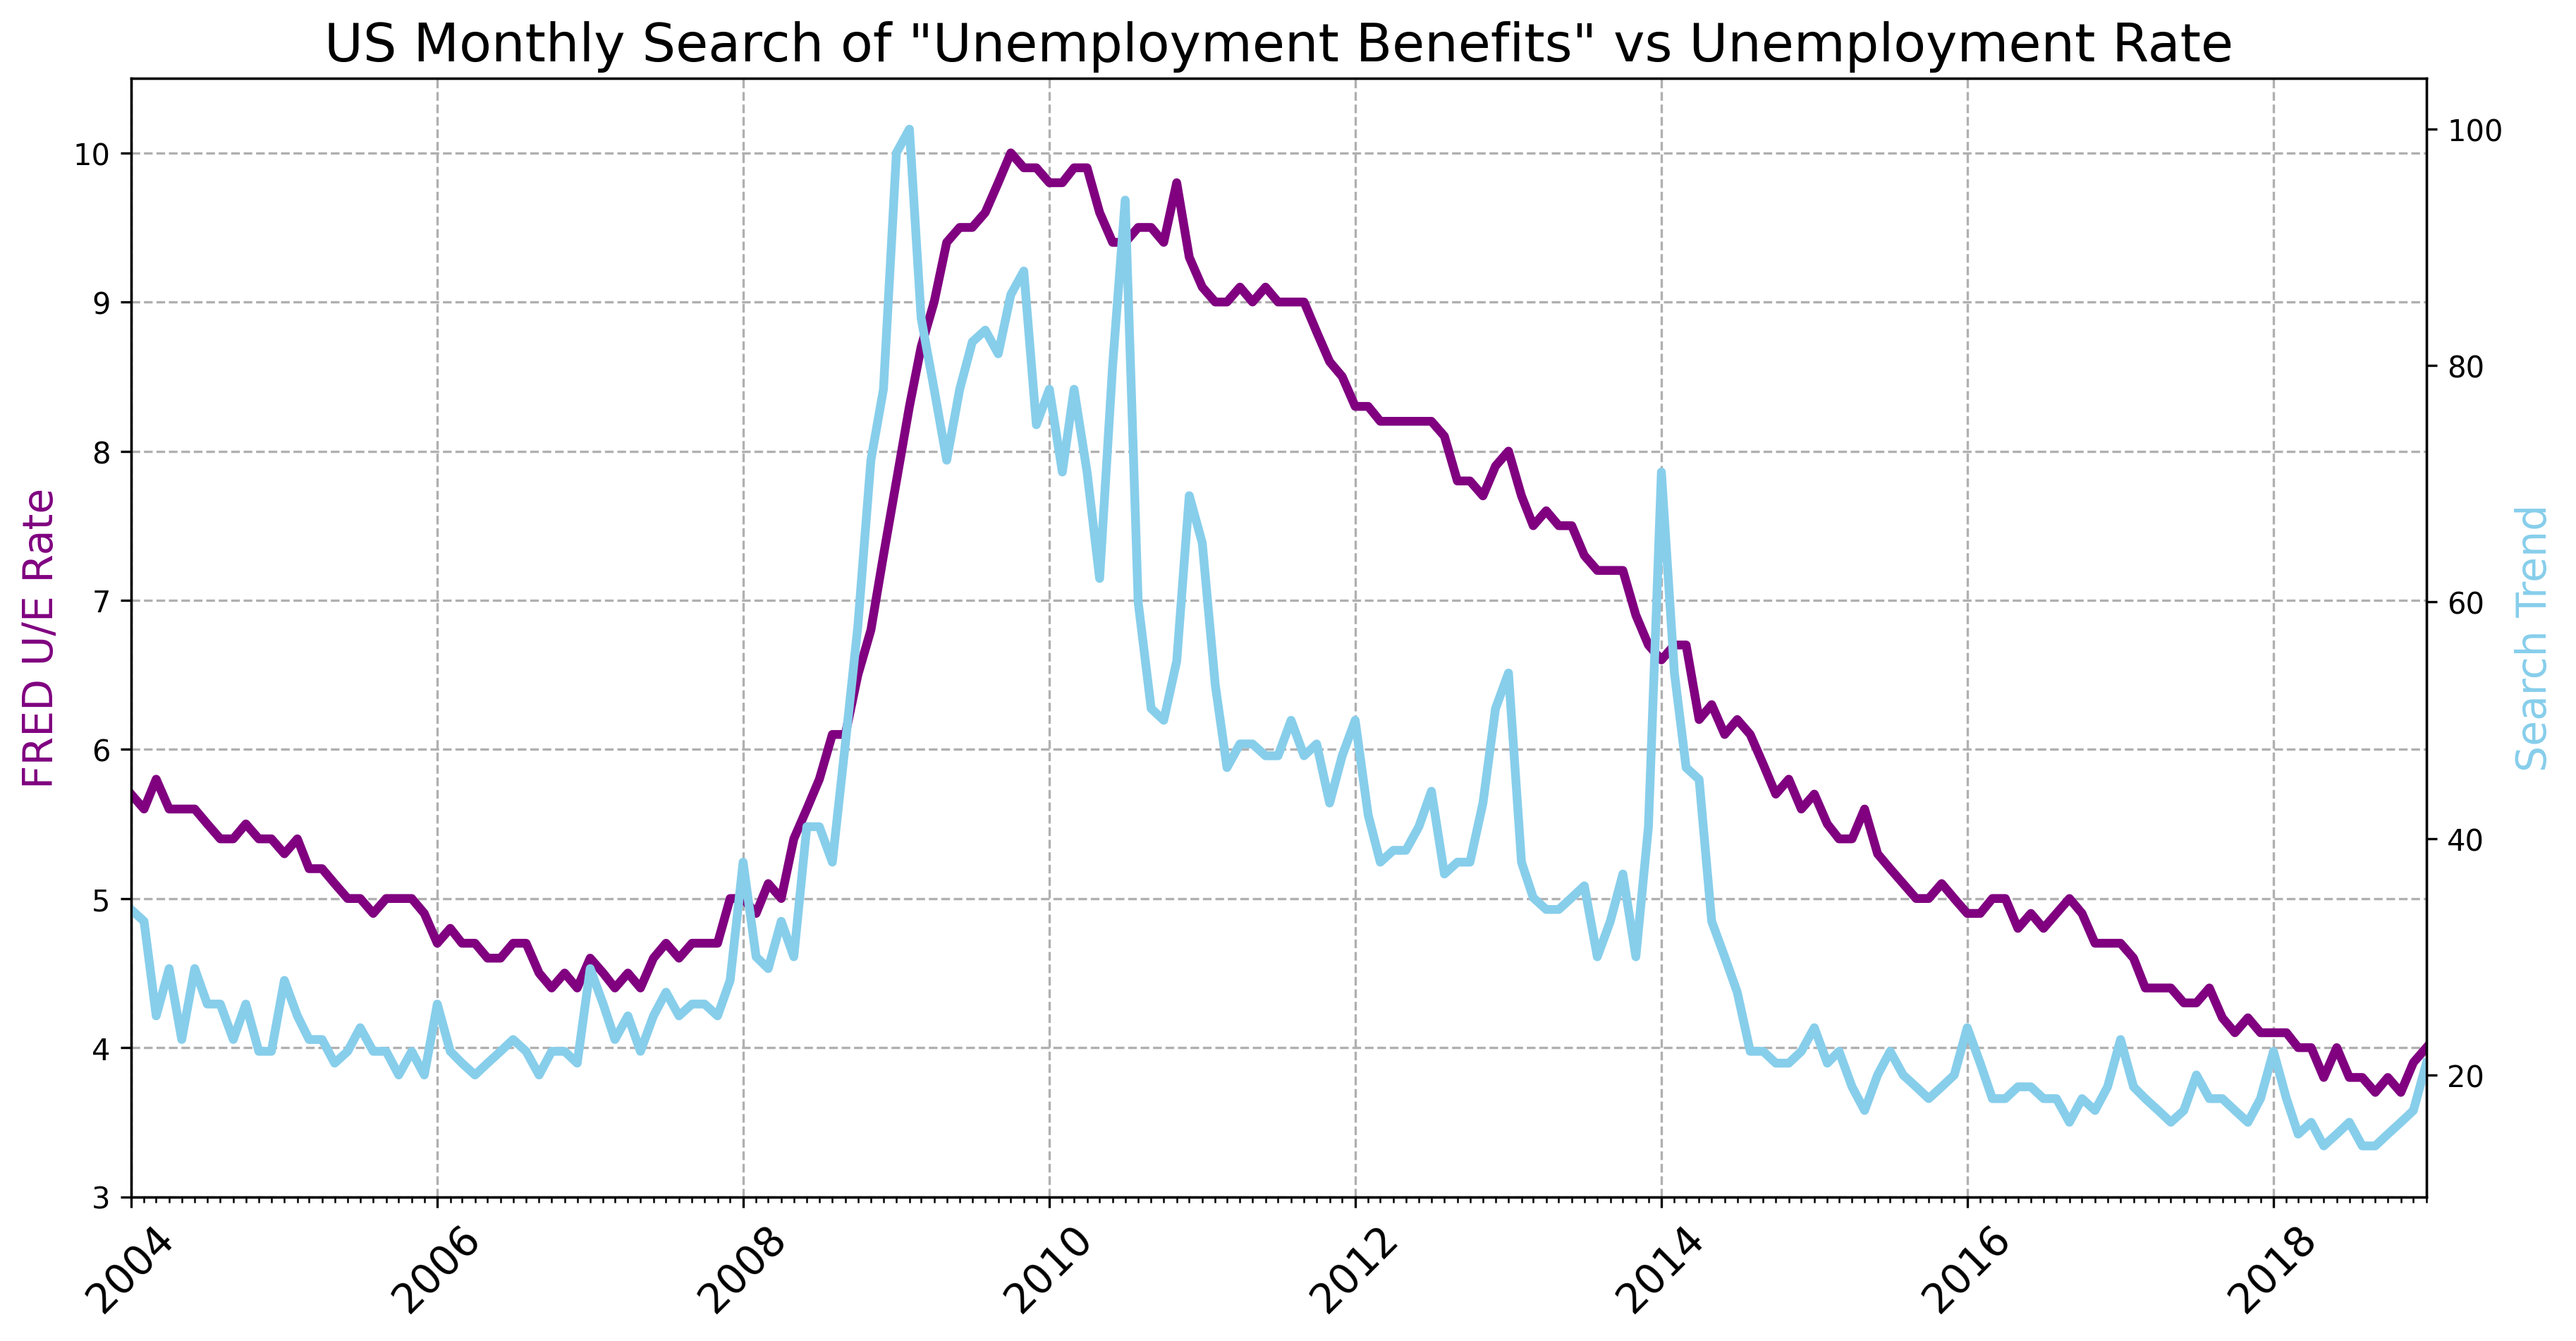

In [127]:
plt.figure(figsize=(14, 7), dpi=300)
plt.xticks(fontsize=14, rotation=45)
plt.grid(linestyle="--")
ax1 = plt.gca()
ax2 = ax1.twinx()
# Limits
plt.xlim(df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max())
ax1.set_ylim(top=10.5, bottom=3)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_minor_locator(month)

# Label
plt.title("US Monthly Search of \"Unemployment Benefits\" vs Unemployment Rate", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="purple", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
ax2.set_xlabel("DATES", fontsize=14)
# Plot
ax2.plot(df_unemployment["MONTH"], df_unemployment["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.plot(df_unemployment["MONTH"], df_unemployment["UNRATE"], color="purple", linewidth=3)


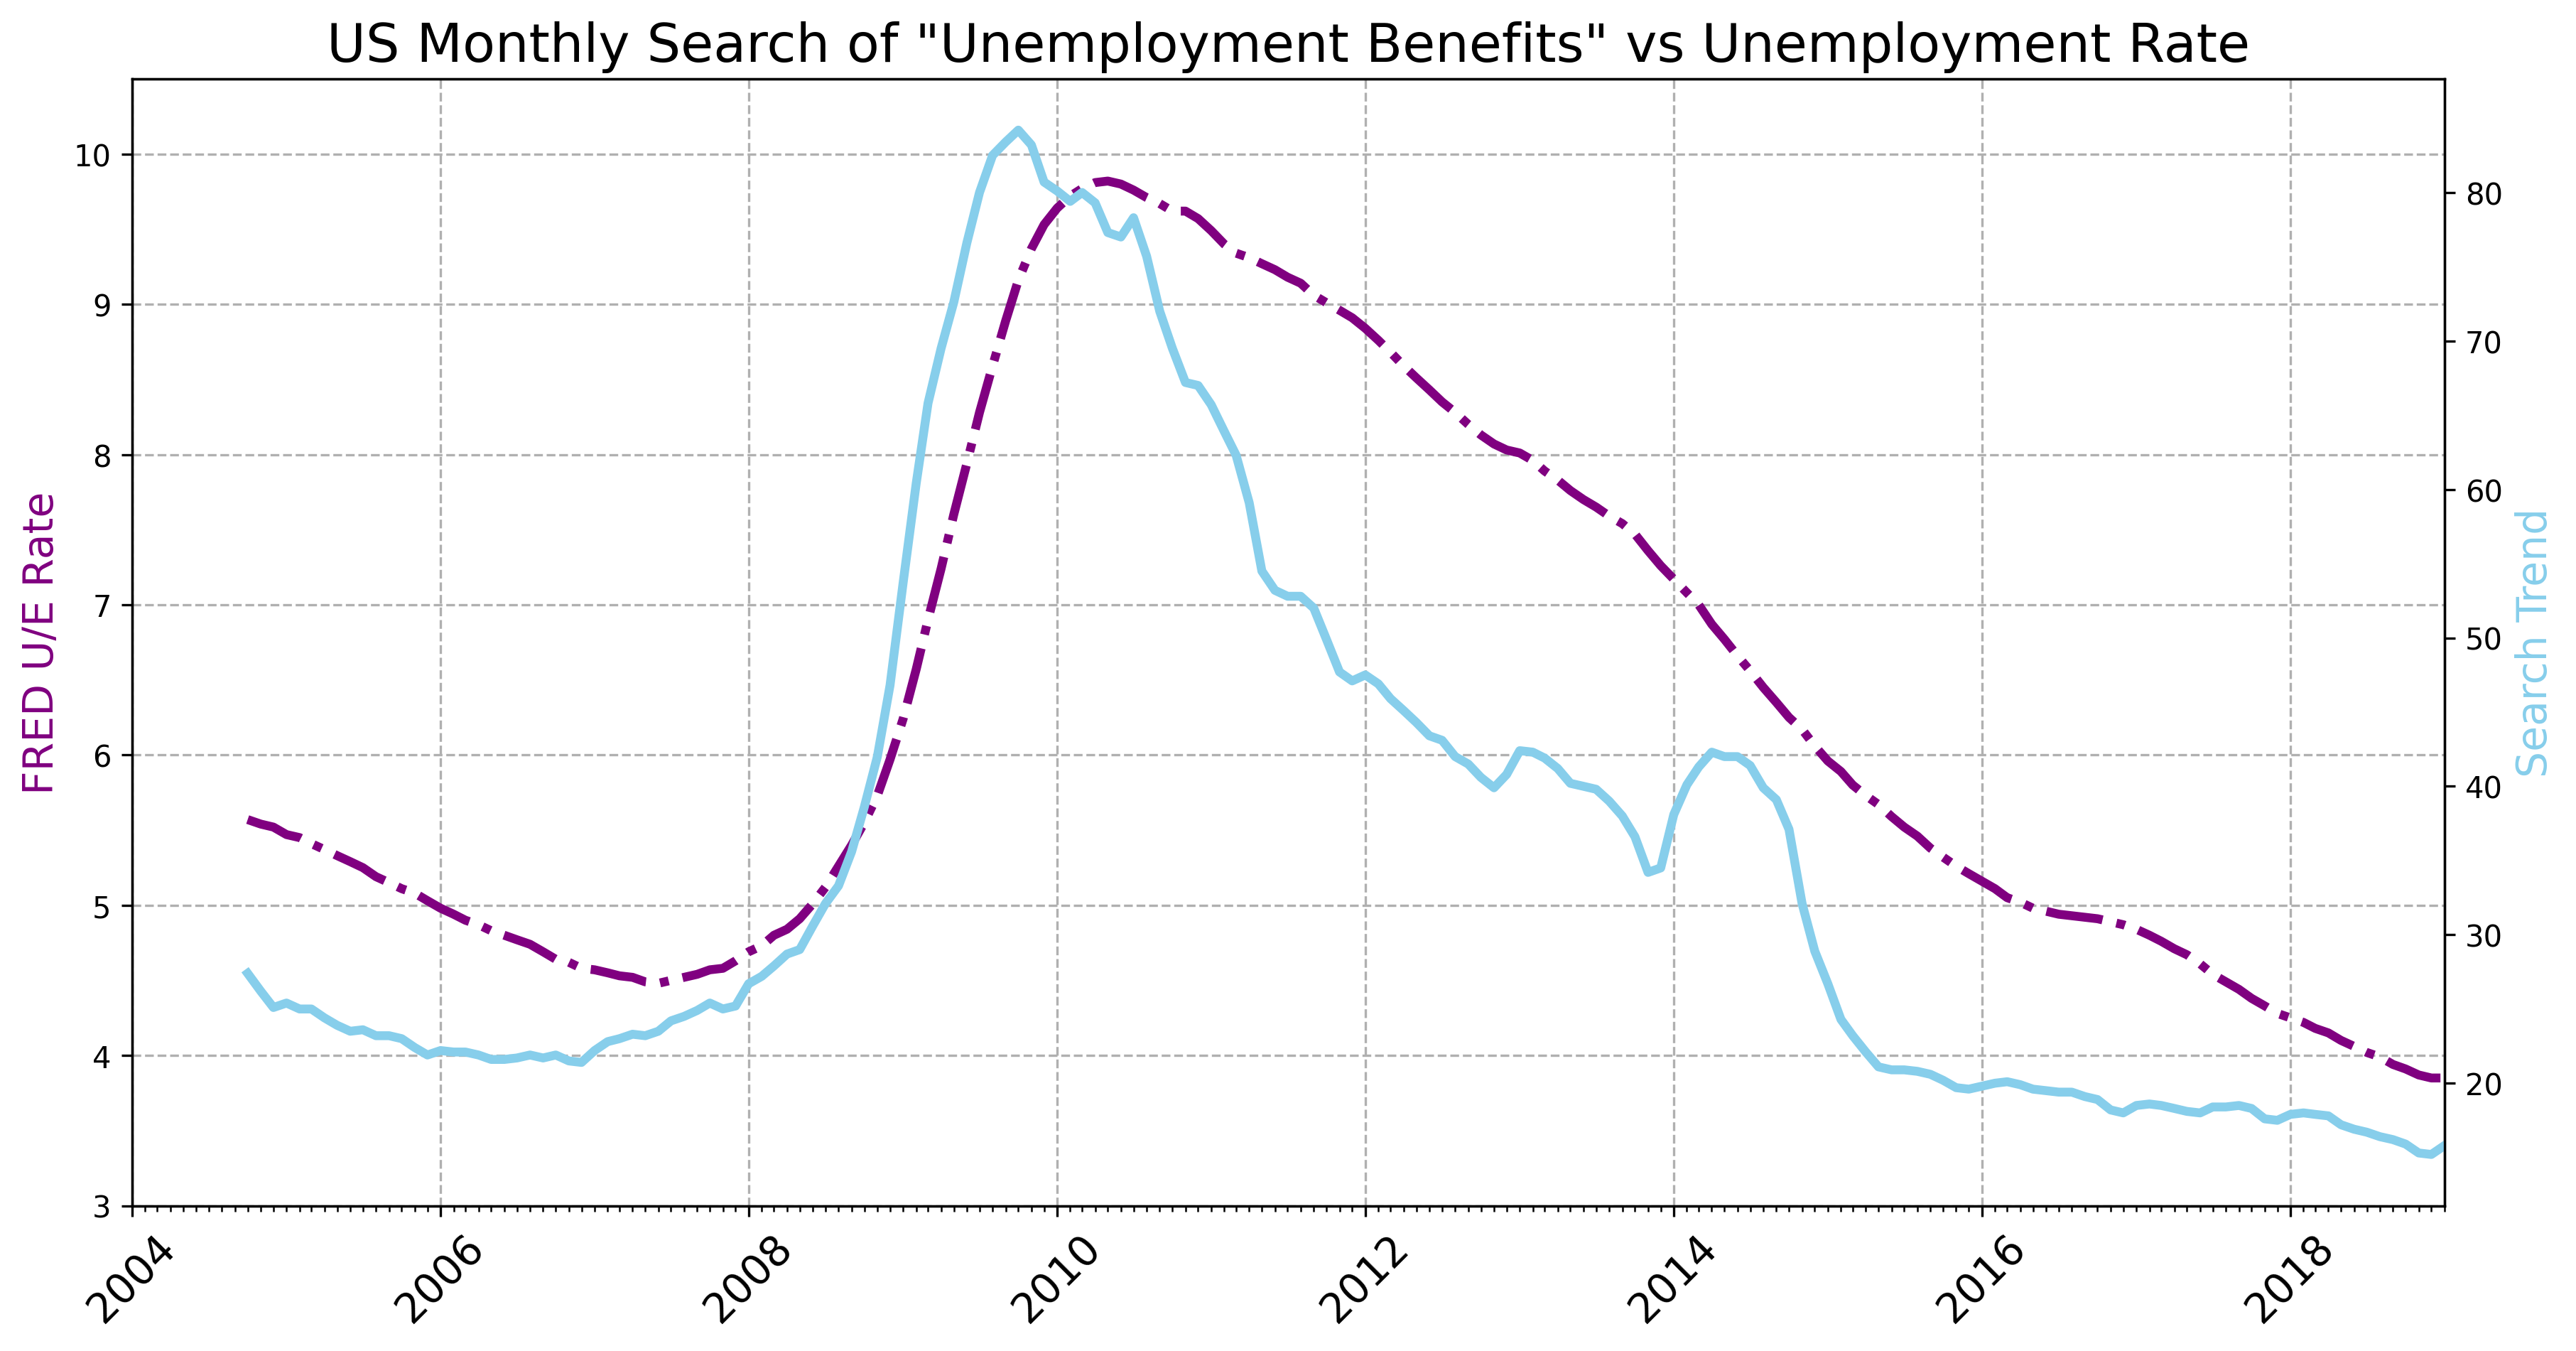

In [138]:
rolll_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()
plt.figure(figsize=(14, 7), dpi=300)
plt.xticks(fontsize=14, rotation=45)
plt.grid(linestyle="--")
ax1 = plt.gca()
ax2 = ax1.twinx()

# Limits
plt.xlim(df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max())
ax1.set_ylim(top=10.5, bottom=3)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_minor_locator(month)

# Label
plt.title("US Monthly Search of \"Unemployment Benefits\" vs Unemployment Rate", fontsize=18)
ax1.set_ylabel("FRED U/E Rate", color="purple", fontsize=14)
ax2.set_ylabel("Search Trend", color="skyblue", fontsize=14)
ax2.set_xlabel("DATES", fontsize=14)
# Plot
ax2.plot(df_unemployment["MONTH"], roll_df["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.plot(df_unemployment["MONTH"], roll_df["UNRATE"], color="purple", linewidth=3, linestyle="-.")

### Including 2020 in Unemployment Charts

In [140]:
df_2020_unemployment = pd.read_csv("/content/UE Benefits Search vs UE Rate 2004-20.csv")
df_2020_unemployment["MONTH"] = pd.to_datetime(df_2020_unemployment["MONTH"])
df_2020_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


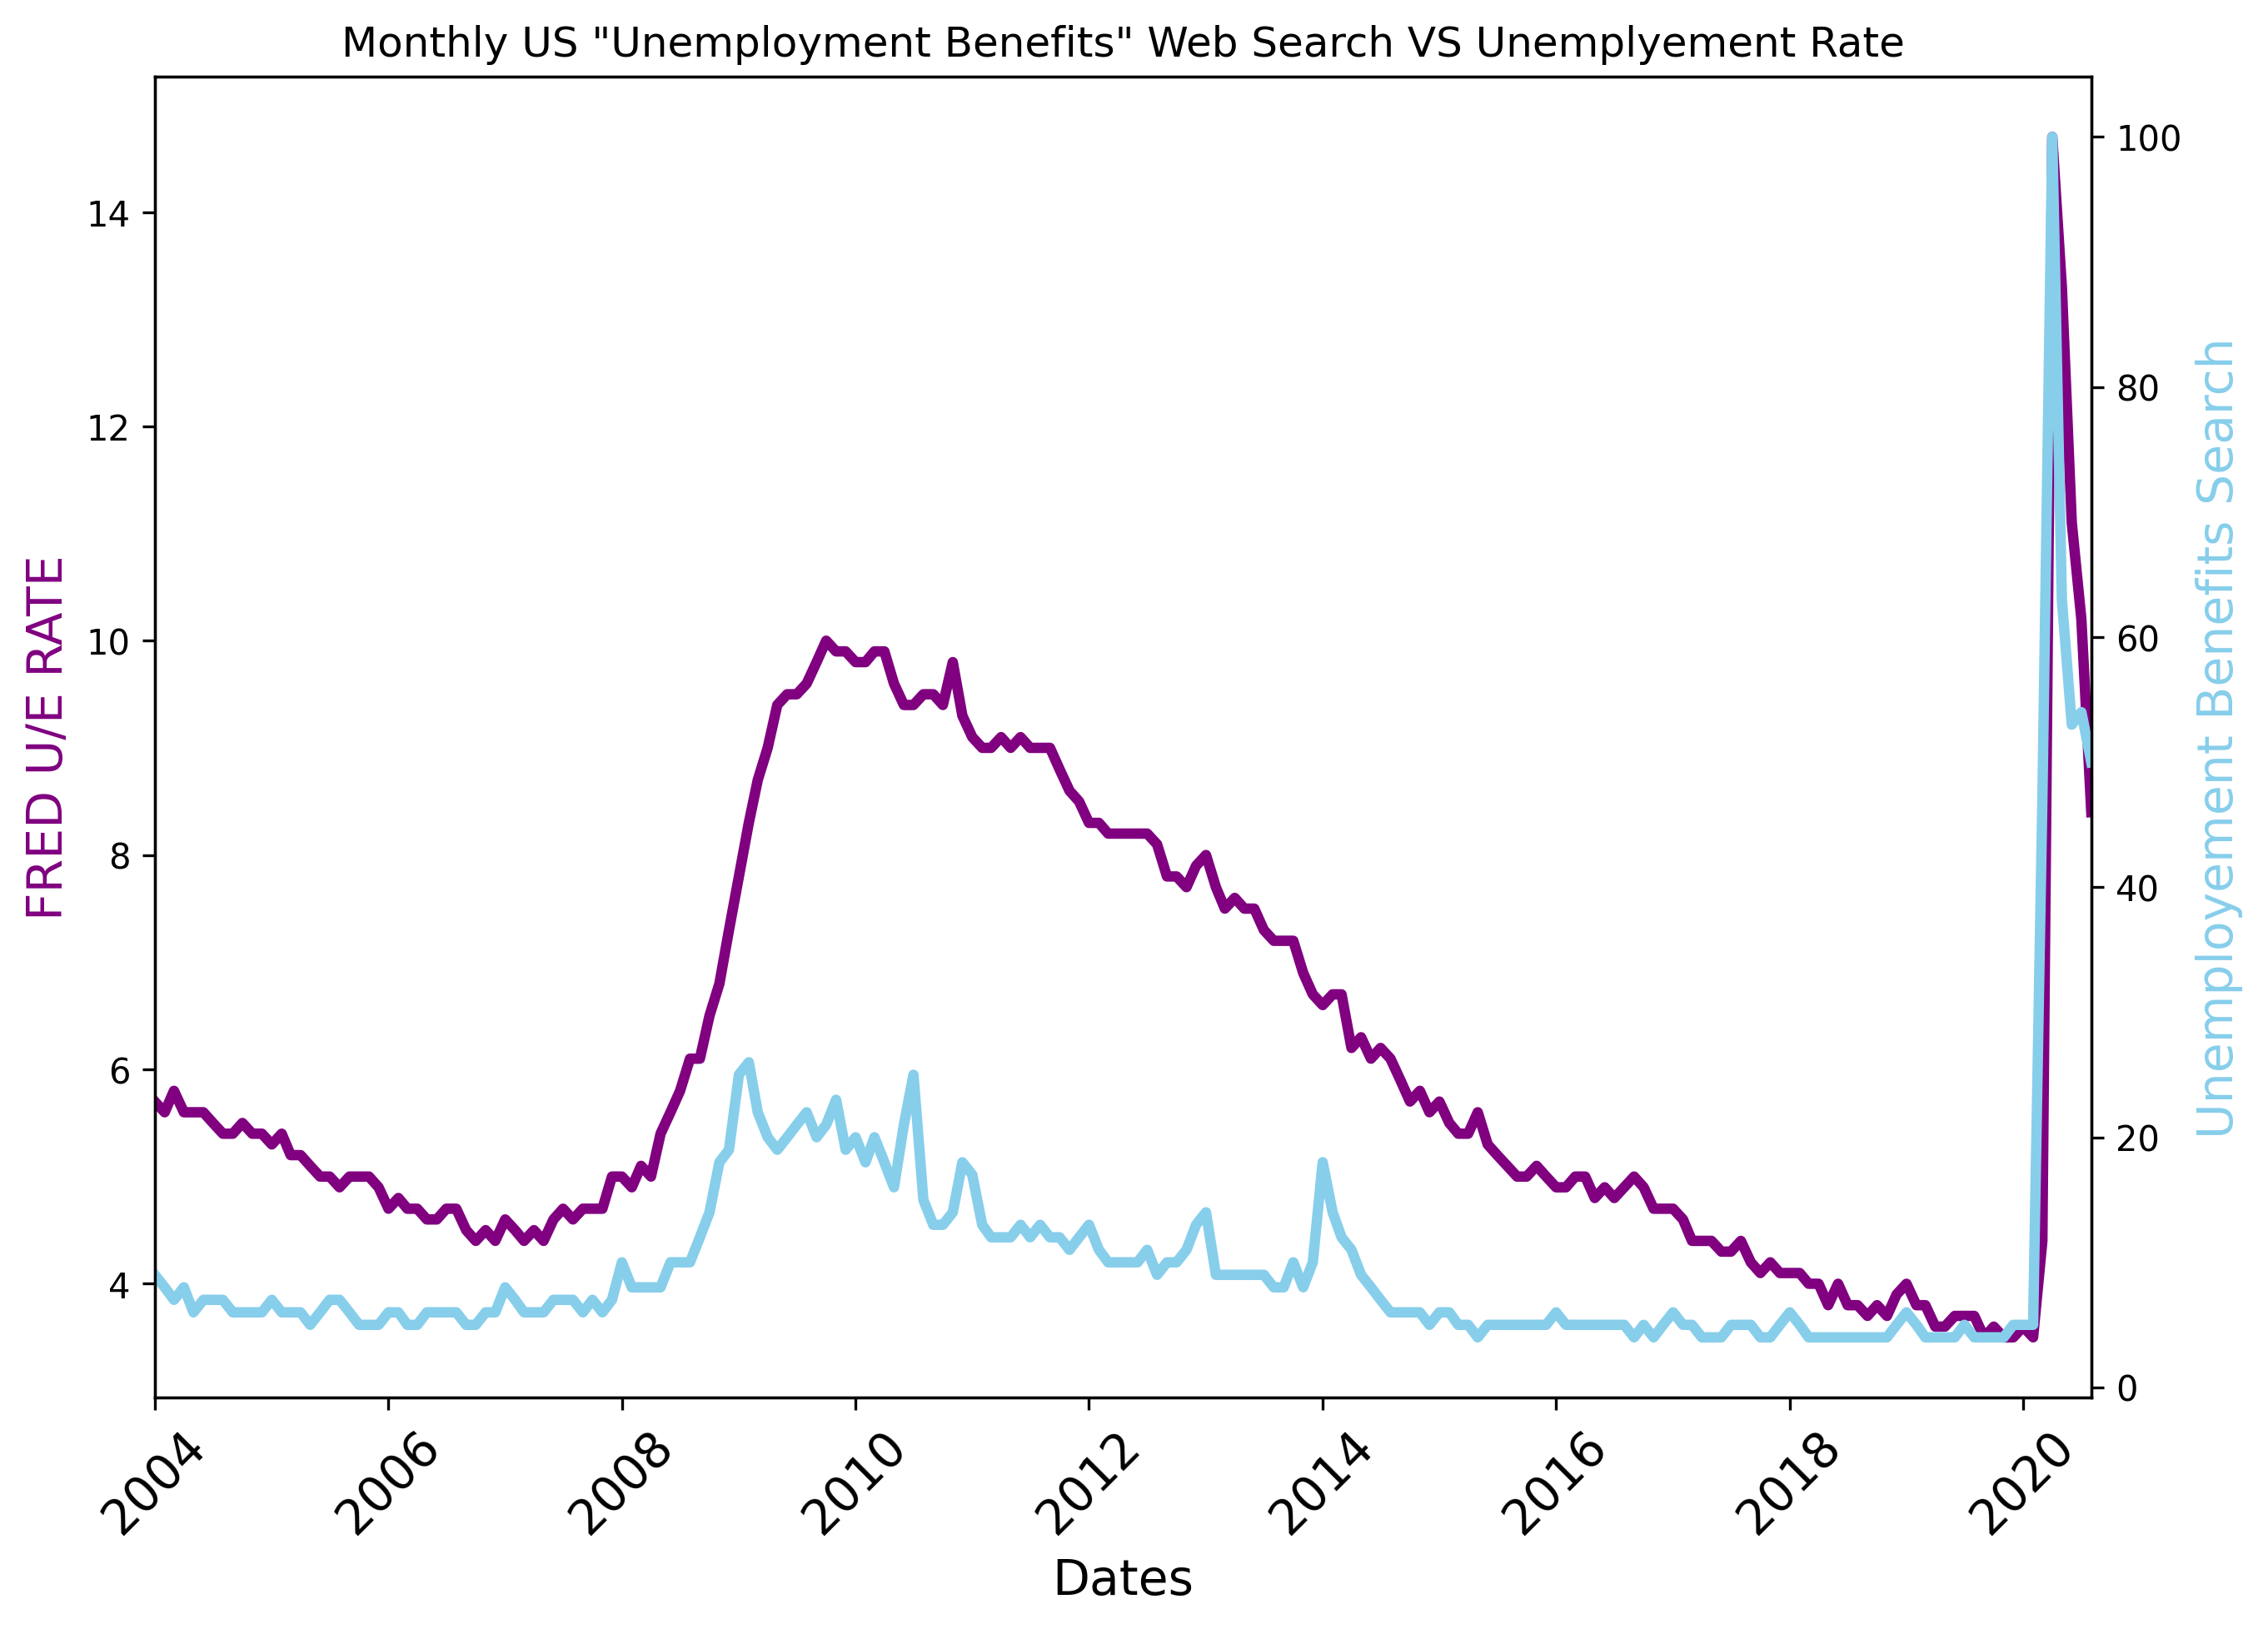

In [150]:
plt.figure(figsize=(10, 7), dpi=300)
plt.title("Monthly US \"Unemployment Benefits\" Web Search VS Unemplyement Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("FRED U/E RATE", color="purple", fontsize=14)
ax2.set_ylabel("Unemployement Benefits Search", color="skyblue", fontsize=14)
ax1.set_xlabel("Dates", fontsize=14)

ax1.set_xlim(df_2020_unemployment["MONTH"].min(), df_2020_unemployment["MONTH"].max())

ax2.plot(df_2020_unemployment["MONTH"], df_2020_unemployment["UE_BENEFITS_WEB_SEARCH"], color="skyblue", linewidth=3)
ax1.plot(df_2020_unemployment["MONTH"], df_2020_unemployment["UNRATE"], color="purple", linewidth=3)